In [1]:
# # Import statements for all problems
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# # Sample uniform (0,1) random variables
# x = np.random.uniform(0, 1, 2)
# print(x)

Stats 597
HW 1

### Problem 1a
Note: you are only allowed to use random number generator for a uniform distribution.
Programming: R, Python or JAVA

Use Monte-Carlo method to directly approximate $\pi$ ("random hit" method). To get a single estimation, use $N=10000$ samples. Generate 1000 estimated $\pi$.

In [2]:
# Solution for Problem 1a
# Psudo-code: 
# get uniform (0,1) 2-tuple
# Check if in circle 
    # x^2 + y^2 < 1
# add to count if in circle
# repeat for N=10,000 samples
# Add to array
# Repeat for M=1000 trials

N = 10000  # number of samples per trial
T = 1000   # number of trials

pi_estimates = np.empty(T)
for i in range(T):
    xy = np.random.uniform(0, 1, (int(N/2), 2))
    count_in_circle = np.sum(np.sum(xy**2, axis=1) < 1)
    pi_estimates[i] = (count_in_circle / (N/2)) * 4

print(f"Mean estimate of pi: {np.mean(pi_estimates)}")
print(f"Standard deviation of estimates: {np.std(pi_estimates)}")

Mean estimate of pi: 3.1412648
Standard deviation of estimates: 0.023526114021656854


### Problem 1b
Use Monte-Carlo method to calculate an integral which leads to an approximation of $\pi$ (Hint: find an integral that equals to some value involving $\pi$). To do the integration, use $N=10000$ samples. Generate 1000 estimated $\pi$.

In [3]:
# Solution for Problem 1b
# Psudo-code:
# Use the integral from 0 to 1 of 4/(1+x^2)
# This is 4(arctan(1) - arctan(0)) = pi

N = 10000
T = 1000

pi_estimates = []
for _ in range(T):
    x_samples = np.random.uniform(0, 1, N)
    integral_estimate = np.mean(4 / (1 + x_samples**2))
    pi_estimates.append(integral_estimate)
    
print(f"Mean estimate of pi: {np.mean(pi_estimates)}")
print(f"Standard deviation of estimates: {np.std(pi_estimates)}")

Mean estimate of pi: 3.141942773299794
Standard deviation of estimates: 0.006423194366991693


### Problem 1c
Compare the two methods in (a) and (b) in terms of variance and running time. Which one do you prefer?

#### Solution

in run time it seems like method (a) is ever so slightly slower. Also method (b) has a lower Standard Deviation consistently. thus I would prefer method (b)

## Problem 2
Write a program to calculate the integration of
$$
\int_{-5}^{5} (x^3 - x^2) e^{-x^2/2} dx
$$

### Problem 2.1
Monte Carlo simulation with $N$ samples from a uniform distribution. For each choice of $N$, repeat the experiment for 500 times, compute the variance and visualize the relationship between the variance and $N$. ($N = 10, 100, 1000$)

N=10: mean=-2.56956, std=1.99696
N=100: mean=-2.51050, std=0.66351
N=1000: mean=-2.49931, std=0.20284


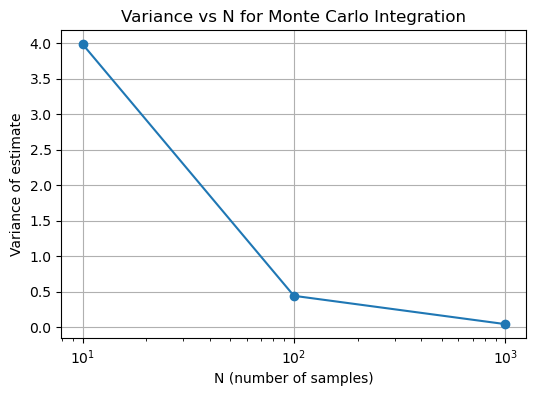

In [4]:

# Define the function to integrate
f = lambda x: (x**3 - x**2) * np.exp(-x**2 / 2)

N_values = [10, 100, 1000]
repeats = 500
results = {}

for N in N_values:
    estimates = np.zeros(repeats)
    for i in range(repeats):
        x = np.random.uniform(0, 1, N)
        x = x * 10 - 5  # Scale to [-5, 5]
        fx = f(x)
        # Monte Carlo estimate
        estimates[i] = (10) * np.mean(fx)  # (b-a) = 10
    results[N] = estimates
    print(f"N={N}: mean={np.mean(estimates):.5f}, std={np.std(estimates):.5f}")

# Plot variance vs N
variances = [np.var(results[N]) for N in N_values]
plt.figure(figsize=(6,4))
plt.plot(N_values, variances, marker='o')
plt.xscale('log')
plt.xlabel('N (number of samples)')
plt.ylabel('Variance of estimate')
plt.title('Variance vs N for Monte Carlo Integration')
plt.grid(True)
plt.show()

### Problem 2.2
Numerical integration with $N$ partitions, for $N = 10, 100, 1000$.

N=10: estimate=-2.50661
N=100: estimate=-2.50659
N=1000: estimate=-2.50659


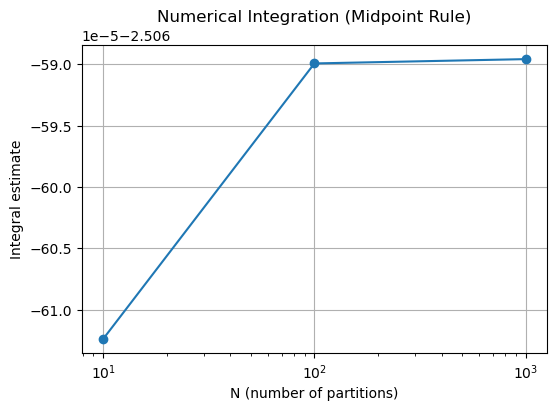

In [5]:
# Define the function to integrate
f = lambda x: (x**3 - x**2) * np.exp(-x**2 / 2)

N_values = [10, 100, 1000]
results = {}

for N in N_values:
    x = np.linspace(-5, 5, N+1)
    x_mid = (x[:-1] + x[1:]) / 2  # Midpoint rule
    dx = (x[1] - x[0])
    fx = f(x_mid)
    estimate = np.sum(fx * dx)
    results[N] = estimate
    print(f"N={N}: estimate={estimate:.5f}")

# Plot estimates vs N
plt.figure(figsize=(6,4))
plt.plot(N_values, [results[N] for N in N_values], marker='o')
plt.xscale('log')
plt.xlabel('N (number of partitions)')
plt.ylabel('Integral estimate')
plt.title('Numerical Integration (Midpoint Rule)')
plt.grid(True)
plt.show()

### Problem 2.3
For method (1), can you find a way to reduce the variance derived above without additional draws of sample? Compare the results. (Hint: symmetry)

N=10: mean=-2.51692, std=0.88118
N=100: mean=-2.50373, std=0.25929
N=1000: mean=-2.50924, std=0.08165


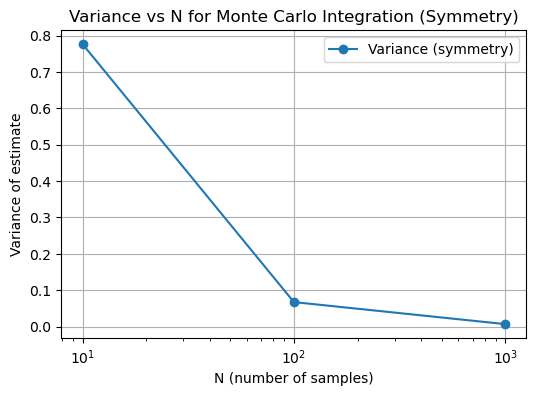

In [6]:
# Solution for Problem 2.3
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate (even function)
f = lambda x:  - x**2 * np.exp(-x**2 / 2)

N_values = [10, 100, 1000]
repeats = 500
results = {}

for N in N_values:
    estimates = np.zeros(repeats)
    for i in range(repeats):
        x = np.random.uniform(0, 1, N)
        x = x * 5  # Only sample from [0, 5]
        fx = f(x)
        # Use symmetry: integral from -5 to 5 = 2 * integral from 0 to 5
        estimates[i] = 2 * 5 * np.mean(fx)  # (b-a) = 5
    results[N] = estimates
    print(f"N={N}: mean={np.mean(estimates):.5f}, std={np.std(estimates):.5f}")

# Plot variance vs N
variances = [np.var(results[N]) for N in N_values]
plt.figure(figsize=(6,4))
plt.plot(N_values, variances, marker='o', label='Variance (symmetry)')
plt.xscale('log')
plt.xlabel('N (number of samples)')
plt.ylabel('Variance of estimate')
plt.title('Variance vs N for Monte Carlo Integration (Symmetry)')
plt.grid(True)
plt.legend()
plt.show()

## Problem 3
Re-write the integral:
$$
I = \int_0^{\infty} \int_{-\infty}^{\infty} (1 + x^2 + \sin(x))^{-|y|^3-2} dy dx
$$
as some expected value, and estimate the integral using Monte-Carlo simulation.

In [7]:
# The integral is:
# I = \int_0^1 \int_{-\infty}^{\infty} (1 + x^2 + sin(x))^{-|y|^3-2} dy dx
# We can use the two random variables X ~ Exponential(1) and Y ~ Normal(0,1) to estimate the integral.
# We do this because bounds of integration are [0,inf] and [-inf,inf]
# I = E[f(X,Y) / (p_X(X) * p_Y(Y))] where p_X and p_Y are the pdfs of X and Y respectively.
# p_X(x) = exp(-x) for x>=0
# p_Y(y) = (1/sqrt(2*pi)) * exp(-y^2/2) for all y
# Psudo-code:
# Sample X from Exponential(1) using inverse transform sampling
# Sample Y from Normal(0,1) using box-muller
# Compute f(X,Y) / (p_X(X) * p_Y(Y))
# Repeat for N=10,100,1000 samples
# Repeat for M=500 trials

N_values = [10, 100, 1000]
repeats = 500
results = {}

def sample_exponential(size, rate=1.0):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / rate

def sample_normal(size, mu=0.0, sigma=1.0):
    u1 = np.random.uniform(0, 1, size//2)
    u2 = np.random.uniform(0, 1, size//2)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    z = np.concatenate([z0, z1])
    if size % 2 == 1:
        u1 = np.random.uniform(0, 1, 1)
        u2 = np.random.uniform(0, 1, 1)
        z_extra = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z = np.append(z, z_extra)
    return mu + sigma * z

for N in N_values:
    estimates = np.zeros(repeats)
    for i in range(repeats):
        X = sample_exponential(N)
        Y = sample_normal(N)
        f_xy = (1 + X**2 + np.sin(X))**(-np.abs(Y)**3 - 2)
        p_X = np.exp(-X)  # Exponential(1) pdf
        p_Y = (1/np.sqrt(2*np.pi)) * np.exp(-Y**2 / 2)  # Normal(0,1) pdf
        weights = f_xy / (p_X * p_Y)
        estimates[i] = np.mean(weights)
    results[N] = estimates
    print(f"N={N}: mean={np.mean(estimates):.5f}, std={np.std(estimates):.5f}")
    


N=10: mean=1.35635, std=0.74152
N=100: mean=1.44386, std=0.58825
N=1000: mean=1.79803, std=8.59953


## Problem 4
Write your own code to simulate 100 samples from:

### Problem 4.1
Exponential distribution: $Exp(\lambda)$ with $\lambda = 2.8$.

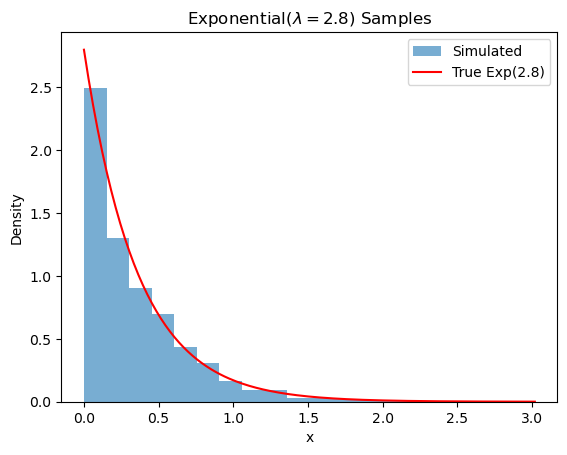

In [8]:
# Solution for Problem 4.1
N = 1000
lam = 2.8

# Inverse transform sampling for exponential
u = np.random.uniform(0, 1, N)
x = -np.log(1 - u) / lam

# Plot the density
import matplotlib.pyplot as plt
plt.hist(x, bins=20, density=True, alpha=0.6, label='Simulated')
# Plot the true density
x_vals = np.linspace(0, np.max(x), 200)
plt.plot(x_vals, lam * np.exp(-lam * x_vals), 'r-', label='True Exp(2.8)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Exponential($\lambda=2.8$) Samples')
plt.legend()
plt.show()

### Problem 4.2
Normal distribution using BOTH Box-Muller transformation AND central limit theorem: $N(\mu, \sigma^2)$ with (a) $(\mu, \sigma^2) = (0,1)$ and (b) $(\mu, \sigma^2) = (3.5,2)$.

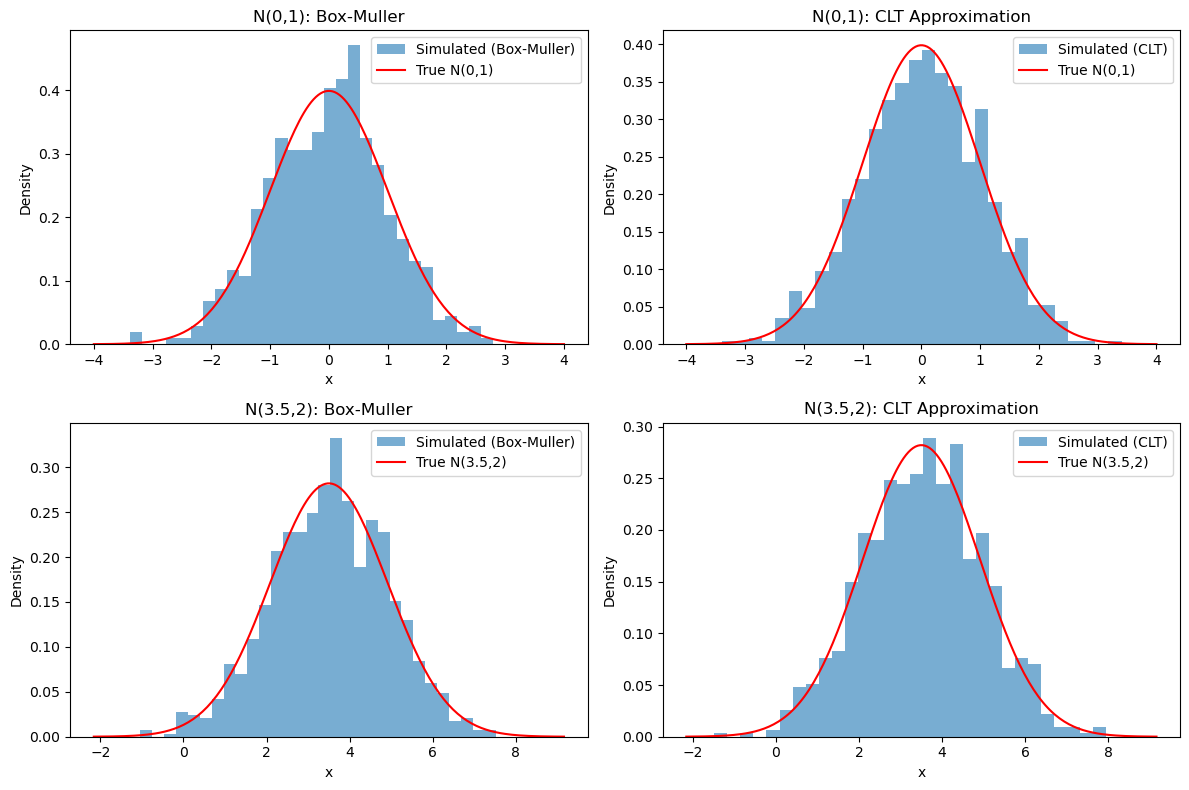

In [9]:
# Solution for Problem 4.2 (Box-Muller and improved CLT for both N(0,1) and N(3.5,2))
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def box_muller_normal(size, mu=0.0, sigma=1.0):
    u1 = np.random.uniform(0, 1, size//2)
    u2 = np.random.uniform(0, 1, size//2)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    z = np.concatenate([z0, z1])
    if size % 2 == 1:
        u1 = np.random.uniform(0, 1, 1)
        u2 = np.random.uniform(0, 1, 1)
        z_extra = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z = np.append(z, z_extra)
    return mu + sigma * z

def clt_normal(size, mu=0.0, sigma=1.0, m=12):
    # CLT: sum of m uniforms, standardize to mean 0, var 1
    u = np.random.uniform(0, 1, (size, m))
    z = np.sum(u, axis=1)
    # Each sum has mean m/2, variance m/12
    z_standardized = (z - m/2) / np.sqrt(m/12)
    return mu + sigma * z_standardized

N = 1000
params = [(0, 1), (3.5, 2)]
titles = ["N(0,1)", "N(3.5,2)"]
plt.figure(figsize=(12, 8))
for i, (mu, sigma2) in enumerate(params):
    sigma = np.sqrt(sigma2)
    # Box-Muller
    samples_bm = box_muller_normal(N, mu, sigma)
    # CLT
    samples_clt = clt_normal(N, mu, sigma)
    # Plot
    plt.subplot(2, 2, 2*i+1)
    plt.hist(samples_bm, bins=30, density=True, alpha=0.6, label='Simulated (Box-Muller)')
    x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
    plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r-', label=f'True {titles[i]}')
    plt.title(f'{titles[i]}: Box-Muller')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.subplot(2, 2, 2*i+2)
    plt.hist(samples_clt, bins=30, density=True, alpha=0.6, label='Simulated (CLT)')
    plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r-', label=f'True {titles[i]}')
    plt.title(f'{titles[i]}: CLT Approximation')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

### Problem 4.3
Log-normal distribution $LnN(\mu, \sigma^2)$ with (a) $(\mu, \sigma^2) = (0,1)$ and (b) $(\mu, \sigma^2) = (-4,2)$.

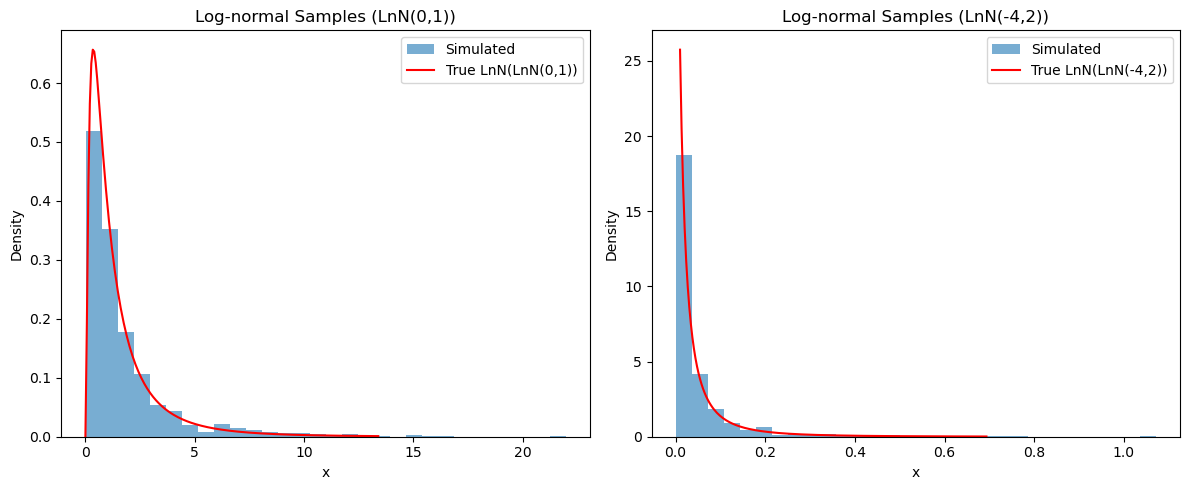

In [10]:
# Solution for Problem 4.3 (using only np.random.uniform(0,1,N))
import numpy as np
import matplotlib.pyplot as plt

def box_muller_normal_uniform(N, mu=0.0, sigma=1.0):
    # Use Box-Muller with uniform(0,1) only
    u1 = np.random.uniform(0, 1, N//2)
    u2 = np.random.uniform(0, 1, N//2)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    z = np.concatenate([z0, z1])
    if N % 2 == 1:
        u1 = np.random.uniform(0, 1, 1)
        u2 = np.random.uniform(0, 1, 1)
        z_extra = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z = np.append(z, z_extra)
    return mu + sigma * z

def simulate_lognormal_uniform(N, mu, sigma2):
    sigma = np.sqrt(sigma2)
    z = box_muller_normal_uniform(N, mu, sigma)
    return np.exp(z)

N = 1000
params = [(0, 1), (-4, 2)]
titles = ["(LnN(0,1))", "(LnN(-4,2))"]
plt.figure(figsize=(12, 5))
for i, (mu, sigma2) in enumerate(params):
    samples = simulate_lognormal_uniform(N, mu, sigma2)
    plt.subplot(1, 2, i+1)
    plt.hist(samples, bins=30, density=True, alpha=0.6, label='Simulated')
    # Plot the true density
    x_vals = np.linspace(0.01, np.percentile(samples, 99.5), 200)
    sigma = np.sqrt(sigma2)
    pdf = (1/(x_vals * sigma * np.sqrt(2*np.pi))) * np.exp(-(np.log(x_vals) - mu)**2 / (2*sigma2))
    plt.plot(x_vals, pdf, 'r-', label=f'True LnN{titles[i]}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title(f'Log-normal Samples {titles[i]}')
    plt.legend()
plt.tight_layout()
plt.show()

### Problem 4.4
Binomial Distribution: $Binomial(n, p)$ with $n = 10$, $p = 0.24$.

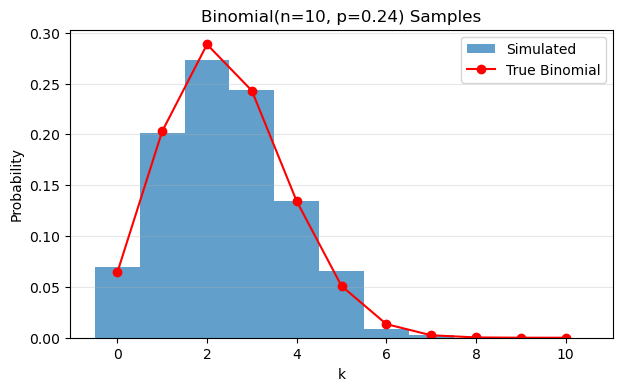

In [11]:
# Solution for Problem 4.4 (using only np.random.uniform(0,1,N))
def simulate_binomial(N, n, p):
    # Simulate N samples from Binomial(n, p) using uniforms
    # For each sample, sum n Bernoulli(p) trials (each from uniform)
    u = np.random.uniform(0, 1, (N, n))
    bern = (u < p).astype(int)
    return np.sum(bern, axis=1)

N = 1000
n = 10
p = 0.24
samples = simulate_binomial(N, n, p)

# Plot the histogram (pmf)
plt.figure(figsize=(7,4))
bins = np.arange(-0.5, n+1.5, 1)
plt.hist(samples, bins=bins, density=True, alpha=0.7, label='Simulated')
# Plot the true binomial pmf for comparison
from scipy.stats import binom
x_vals = np.arange(0, n+1)
plt.plot(x_vals, binom.pmf(x_vals, n, p), 'ro-', label='True Binomial')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title(f'Binomial(n={n}, p={p}) Samples')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In each case, plot the density of sample sets to illustrate (validate) your simulated samples.

## Problem 5
Write a program to simulate a set of 500 samples from the following distribution with density:
$$
f(x) = \begin{cases} \frac{1}{c} f_{t_5}(x) \left[1 - \frac{\sin(20x)}{4}\right] & \text{if } |x| < 3 \\ 0 & \text{if } |x| > 3 \end{cases}
$$
where $f_{t_5}(x)$ is the density function of the $t$-distribution with 5 degrees of freedom and
$$
c = \int_{-3}^{3} f_{t_5}(x) \left[1 - \frac{\sin(20x)}{4}\right] dx
$$
Plot the density of your simulated samples.

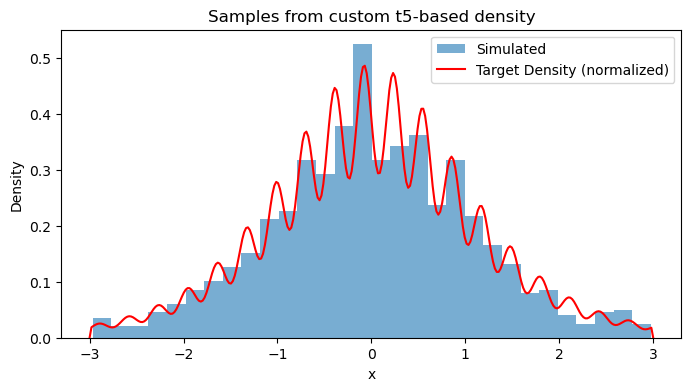

In [12]:
from scipy.stats import t

def clt_normal(size, mu=0.0, sigma=1.0, m=12):
    u = np.random.uniform(0, 1, (size, m))
    z = np.sum(u, axis=1)
    z_standardized = (z - m/2) / np.sqrt(m/12)
    return mu + sigma * z_standardized

def chi_squared_sample(N, df=1):
    # Chi-squared with df degrees of freedom is sum of squares of df N(0,1) variables
    z = clt_normal(N * df, mu=0, sigma=1, m=12).reshape(N, df)
    chi2 = np.sum(z**2, axis=1)
    return chi2

def t_sample(N, df):
    # Sample N values from t-distribution with df degrees of freedom using only uniforms
    z = clt_normal(N, mu=0, sigma=1, m=12)
    chi2 = chi_squared_sample(N, df)
    t_vals = z / np.sqrt(chi2 / df)
    return t_vals

# Now simulate from the target density using rejection sampling
N = 1000
df = 5
def target_density(x):
    return t.pdf(x, df) * (1 - np.sin(20*x)/4) * (np.abs(x) < 3)

# Find the maximum of the ratio for rejection sampling (conservative upper bound)
M = 1.5  # Chosen by inspection, safe for this function on [-3,3]
samples = []
attempts = 0
while len(samples) < N:
    x_cand = t_sample(1, df)[0]
    if np.abs(x_cand) > 3:
        continue
    u = np.random.uniform(0, 1)
    if u < (1 - np.sin(20*x_cand)/4) / M:
        samples.append(x_cand)
    attempts += 1

samples = np.array(samples)

# Plot the density of simulated samples
plt.figure(figsize=(8,4))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Simulated')
x_vals = np.linspace(-3, 3, 300)
plt.plot(x_vals, target_density(x_vals)/np.trapz(target_density(x_vals), x_vals), 'r-', label='Target Density (normalized)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Samples from custom t5-based density')
plt.legend()
plt.show()